<a href="https://colab.research.google.com/github/AnabelBerumen/DataScientist/blob/main/modelos/SuportVectorMachine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Suport Vector Machine

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import style
style.use('ggplot')
from sklearn import svm

In [ ]:
X = [1, 5, 1.5, 8, 1, 9]
Y = [2, 8, 1.8, 8, 0.6, 11]

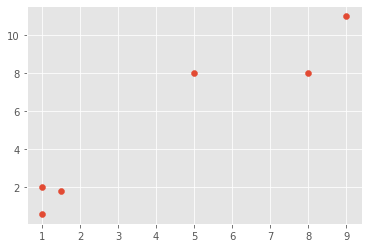

In [ ]:
plt.scatter(X, Y)
plt.show()

In [ ]:
data = np.array(list(zip(X,Y)))
data

array([[ 1. ,  2. ],
       [ 5. ,  8. ],
       [ 1.5,  1.8],
       [ 8. ,  8. ],
       [ 1. ,  0.6],
       [ 9. , 11. ]])

Vamos a etiquetar los datos, ya que se trata de un algortmo supervisado.

In [ ]:
target = [0, 1, 0, 1, 0, 1]

Creamos el clasificador

In [ ]:
# linear = hiperplano (recta)
classifier = svm.SVC(kernel='linear', C = 1.0) 
classifier.fit(data, target)

SVC(kernel='linear')

In [ ]:
p = (np.array([0.57, 0.67]).reshape(1,2))
print(p)
classifier.predict(p)

[[0.57 0.67]]


array([0])

# Predict on the test features, print the results
pred = knn.predict(X_test)[0]

print("Prediction for test example 0:", pred)

In [ ]:
p = (np.array([10.57, 6.67]).reshape(1,2))
print(p)
classifier.predict(p)

[[10.57  6.67]]


array([1])

Modelo 
* w0 * x + w1 * y + e = 0

el hiperplano en 2D obtenido sera 
* y = a * x + b

In [ ]:
w = classifier.coef_[0]
w

array([0.1380943 , 0.24462418])

In [ ]:
a = -w[0] / w[1]
a

-0.564516129032258

In [ ]:
b = -classifier.intercept_[0] / w[1]
b

6.734677437813051

In [ ]:
xx = np.linspace(0, 10)
yy = a * xx + b

[]

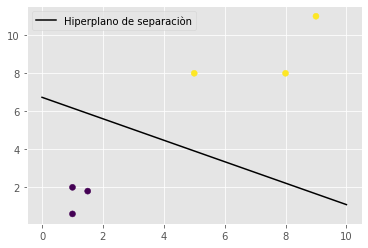

In [ ]:
plt.plot(xx, yy, 'k-', label='Hiperplano de separaciòn')
plt.scatter(X, Y, c=target)
plt.legend()
plt.plot()

## Linear Suport Vector Machine
Fitting and predicting

In [ ]:
import sklearn.datasets
newsgroups = sklearn.datasets.fetch_20newsgroups_vectorized()
X, y = newsgroups.data, newsgroups.target

In [ ]:
X.shape, y.shape

((11314, 130107), (11314,))

In [ ]:
# import classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X, y)

y_pred = knn.predict(X)

In [ ]:
# Model evaluation
score = knn.score(X, y)
print(f'Score: {score}')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

# refit on the training set
knn.fit(X_train, y_train)
score = knn.score(X_test, y_test)
print(f'Score: {score}')

Score: 0.9999116139296447
Score: 0.6581831035701662


training error was definitely a poor representation of the model's ability to classify new data

## Using LogisticRegression

In [ ]:
import sklearn.datasets
wine = sklearn.datasets.load_wine()
from sklearn.linear_model import LogisticRegression

"""lr = LogisticRegression().fit(X_train, y_train)
predict = lr.predict(X_train)
score = lr.score(X_test, y_test)"""

lr = LogisticRegression(solver='lbfgs', max_iter=3000)
lr.fit(wine.data, wine.target)
predict = lr.predict(wine.data)
score = lr.score(wine.data, wine.target)

print(f'Score: {score}')

Score: 0.9943820224719101


In [ ]:
lr.predict_proba(wine.data[:1])

array([[9.99810291e-01, 2.52717668e-05, 1.64436856e-04]])

## Using LinearSVC

In [ ]:
import sklearn.datasets

wine = sklearn.datasets.load_wine()
from sklearn.svm import LinearSVC

svm = LinearSVC(max_iter=5000)
svm.fit(wine.data, wine.target)

score = svm.score(wine.data, wine.target)
score

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9438202247191011

## Logistic Regression & SVM

## Using SVC

In [ ]:
import sklearn.datasets

wine = sklearn.datasets.load_wine()
from sklearn.svm import SVC

svm = SVC()
svm.fit(wine.data, wine.target)

score = svm.score(wine.data, wine.target)
score

0.7078651685393258

In [ ]:
# Ejercicio

from sklearn import datasets
digits = datasets.load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

# Apply logistic regression and print scores
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

# Apply SVM and print scores
svm = SVC()
svm.fit(X_train, y_train)
print(svm.score(X_train, y_train))
print(svm.score(X_test, y_test))


# 2
# Instantiate logistic regression and train
lr = LogisticRegression()
lr.fit(X, y)

# Predict sentiment for a glowing review
review1 = "LOVED IT! This movie was amazing. Top 10 this year."
review1_features = get_features(review1)
print("Review:", review1)
print("Probability of positive review:", lr.predict_proba(review1_features)[0,1])

# Predict sentiment for a poor review
review2 = "Total junk! I'll never watch a film by that director again, no matter how good the reviews."
review2_features = get_features(review2)
print("Review:", review2)
print("Probability of positive review:", lr.predict_proba(review2_features)[0,1])

In [ ]:
# ejercicio
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

# Define the classifiers
classifiers = [LogisticRegression(), SVC(), LinearSVC(), KNeighborsClassifier()]

# Fit the classifiers
for c in classifiers:
    c.fit(X, y)

# Plot the classifiers
plot_4_classifiers(X, y, classifiers)
plt.show()

## Support Vector Machines

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as stats

import seaborn as sns; sns.set()

In [ ]:
from sklearn.datasets import make_blobs

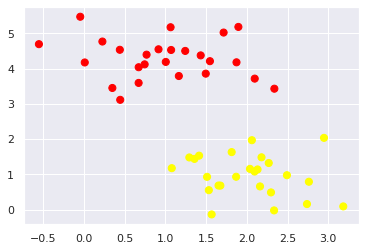

In [ ]:
# Y son las clasificaciones
#X[:,0] es un conjunto y X[:,1] es otro
X, Y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.6)
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap='autumn')

(-1.0, 3.5)

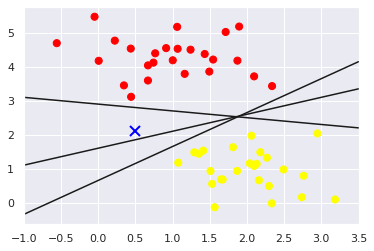

In [ ]:
xx = np.linspace(-1, 3.5)
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap='autumn')
plt.plot([0.5], [2.1], 'x', color='blue', markeredgewidth=2, markersize=10)

for a, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
  yy = a * xx + b
  plt.plot(xx, yy, '-k')

plt.xlim(-1, 3.5)

## MAximizaciòn del margen

(-1.0, 3.5)

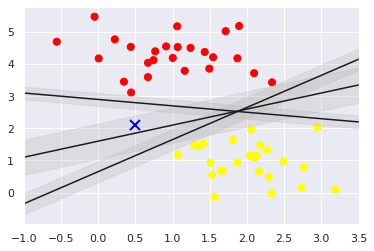

In [ ]:
xx = np.linspace(-1, 3.5)
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap='autumn')
plt.plot([0.5], [2.1], 'x', color='blue', markeredgewidth=2, markersize=10)

for a, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
  yy = a * xx + b
  plt.plot(xx, yy, '-k')
  plt.fill_between(xx, yy-d, yy+d, edgecolor='none', color='#BBBBBB', alpha=0.3)


plt.xlim(-1, 3.5)

### soportes de vectores como clasificadores
## Creamos un modelo SVM

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C = 1E10)
model.fit(X, Y)

SVC(C=10000000000.0, kernel='linear')

In [ ]:
def plt_svc (model, ax=None, plot_support=True):
  """Plot de la funcion de decision para una clasificacion en 2D con SVC"""

  if ax is None:
    ax = plt.gca()
  
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()

  # Generamos la parrilla de puntos para evaluar el modelo
  xx = np.linspace(xlim[0], xlim[1], 30) # filas
  yy = np.linspace(ylim[0], ylim[1], 30) # columnas
  Y, X = np.meshgrid(yy, xx)
  #para convinar
  xy = np.vstack([X.ravel(), Y.ravel()]).T # la T es de tupla
  P = model.decision_function(xy).reshape(X.shape)

  # Representamos fronteras y margenes del SVC
  ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

  # hacemos los suport vectors
  if plot_support:
    ax.scatter(model.support_vectors_[:,0],
               model.support_vectors_[:,1],
               s=300, linewidth=1, facecolors='black')
    
  ax.set_xlim(xlim)
  ax.set_ylim(ylim)

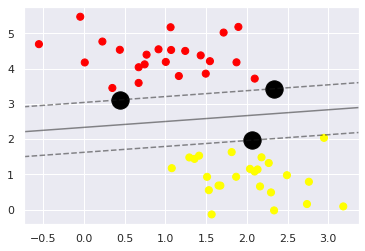

In [ ]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap='autumn')
plt_svc(model)

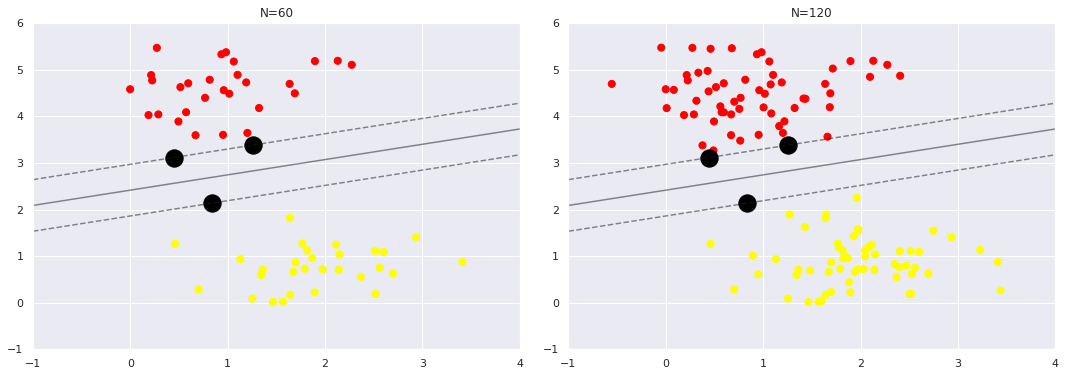

In [ ]:
def plot_svm(N=10, ax=None):
  X, Y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.6)

  X = X[:N]
  Y = Y[:N]

  model = SVC(kernel='linear', C=1E10)
  model.fit(X, Y)

  ax = ax or plt.gca()
  ax.scatter(X[:,0], X[:,1], c=Y, s=50, cmap='autumn')
  ax.set_xlim(-1, 4)
  ax.set_ylim(-1, 6)
  plt_svc(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for ax_i, N, in zip(ax, [60, 120]):
  plot_svm(N, ax_i)
  ax_i.set_title('N={0}'.format(N))

In [ ]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10,200],ax=fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

<function __main__.plot_svm(N=10, ax=None)>

## kernels no lineales

In [ ]:
from sklearn.datasets import make_circles

X, Y = make_circles(100, factor = .1, noise = .1)

def plt_svc (model, ax=None, plot_support=True):
  """Plot de la funcion de decision para una clasificacion en 2D con SVC"""

  if ax is None:
    ax = plt.gca()
  
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()

  # Generamos la parrilla de puntos para evaluar el modelo
  xx = np.linspace(xlim[0], xlim[1], 30) # filas
  yy = np.linspace(ylim[0], ylim[1], 30) # columnas
  Y, X = np.meshgrid(yy, xx)
  #para convinar
  xy = np.vstack([X.ravel(), Y.ravel()]).T # la T es de tupla
  P = model.decision_function(xy).reshape(X.shape)

  # Representamos fronteras y margenes del SVC
  ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

  # hacemos los suport vectors
  if plot_support:
    ax.scatter(model.support_vectors_[:,0],
               model.support_vectors_[:,1],
               s=300, linewidth=1, facecolors='blue')
    
  ax.set_xlim(xlim)
  ax.set_ylim(ylim)




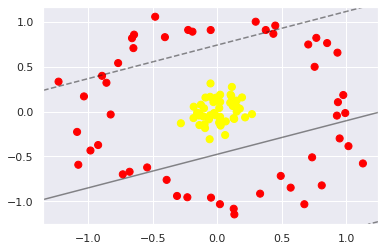

In [ ]:
# from sklearn.svm import SVC
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap='autumn')
plt_svc(SVC(kernel='linear').fit(X,Y), plot_support=False)

In [ ]:
r = np.exp(-(X**2).sum(1))

In [ ]:
from mpl_toolkits import mplot3d

In [ ]:
def plot_3D(elev=30, azim=30, X=X, Y=Y, r=r):
  ax = plt.subplot(projection='3d')
  ax.scatter3D(X[:,0], X[:,1], r, c=Y, s=50, cmap='autumn')
  ax.view_init(elev=elev, azim=azim)

  ax.set_xlabel('x[0]')
  ax.set_ylabel('y[1]')
  ax.set_zlabel('r')

# from ipywidgets import interact, fixed
interact(plot_3D, elev=[-90, -45, -30, 0, 30, 45,90], azim=[-180, -90, -30, -0, 30, 90,180], X=fixed(X), Y=fixed(Y), r=fixed(r))


interactive(children=(Dropdown(description='elev', index=4, options=(-90, -45, -30, 0, 30, 45, 90), value=30),…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-1.03410900e+00,  1.68321662e-01],
       [ 2.29540061e-02,  1.06459283e-01],
       [-1.38169413e-01, -1.51039516e-01],
       [ 2.69864999e-01, -2.89516968e-02],
       [ 2.29757831e-02,  1.87197631e-01],
       [ 1.58813718e-02,  3.90610965e-02],
       [-4.80257804e-02, -9.58819267e-01],
       [-2.92023162e-02,  1.04952046e-01],
       [-7.32567068e-01, -6.99139169e-01],
       [ 7.56233115e-01,  4.97801788e-01],
       [ 7.06745799e-01,  7.46291270e-01],
       [ 1.01169701e-01,  9.76846781e-02],
       [-1.08744407e+00, -2.27012683e-01],
       [ 1.53501529e-01,  5.13235791e-02],
       [ 2.29422538e-02, -9.69803459e-02],
       [-2.82002077e-01, -1.30685076e-01],
       [-1.44848494e-01, -2.39765827e-02],
       [ 1.20626284e-01,  6.17904161e-02],
       [ 2.23847756e-02, -5.89034160e-02],
       [-1.23134970e+00,  3.32695624e-01],
       [ 1.33238871e-01, -1.14567821e+00],
       [ 2.16637285e-01, -6.54799318e-02],
       

In [ ]:
rbf = SVC(kernel='rbf', C=1E6)
rbf.fit(X,Y)

SVC(C=1000000.0)

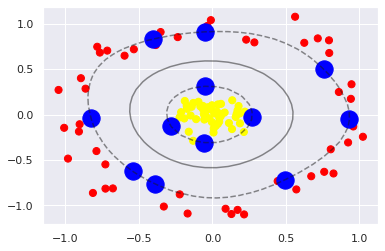

In [ ]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap='autumn')
plt_svc(rbf)
plt.scatter(rbf.support_vectors_[:,0], rbf.support_vectors_[:,1], s=300, lw=1, facecolors='none')

## Ajustar params. de SVM

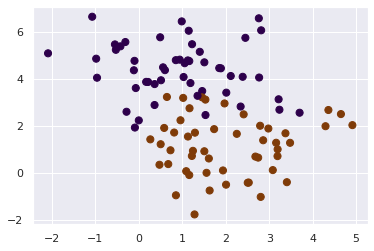

In [ ]:
X, Y = make_blobs(n_samples=100, centers = 2, random_state=0, cluster_std=1.2)
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap='PuOr_r')

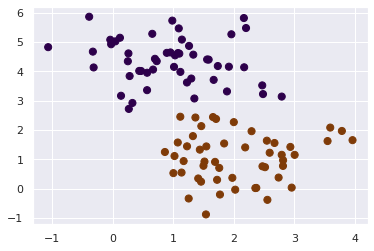

In [ ]:
X, Y = make_blobs(n_samples=100, centers = 2, random_state=0, cluster_std=0.8)
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap='PuOr_r')

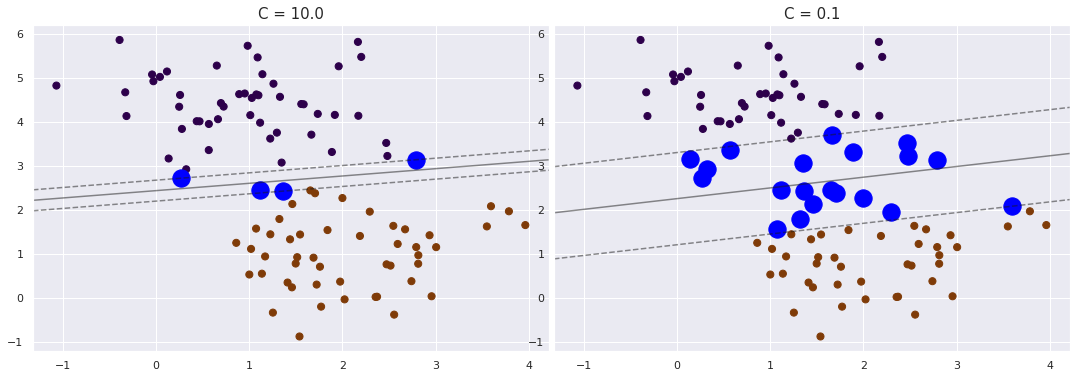

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
fig.subplots_adjust(left=0.05, right=0.95, wspace=0.01)

for ax_i, C in zip(ax, [10.0, 0.1]):
  model = SVC(kernel='linear', C=C)
  model.fit(X,Y)
  ax_i.scatter(X[:,0], X[:,1], c=Y, s=50, cmap='PuOr_r')
  plt_svc(model, ax_i)
  ax_i.set_title('C = {0:.1f}'.format(C), size=15)

## Utilizando SVM 
### Face recognition

In [ ]:
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=60)

In [ ]:
# A quien nos descargo???
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


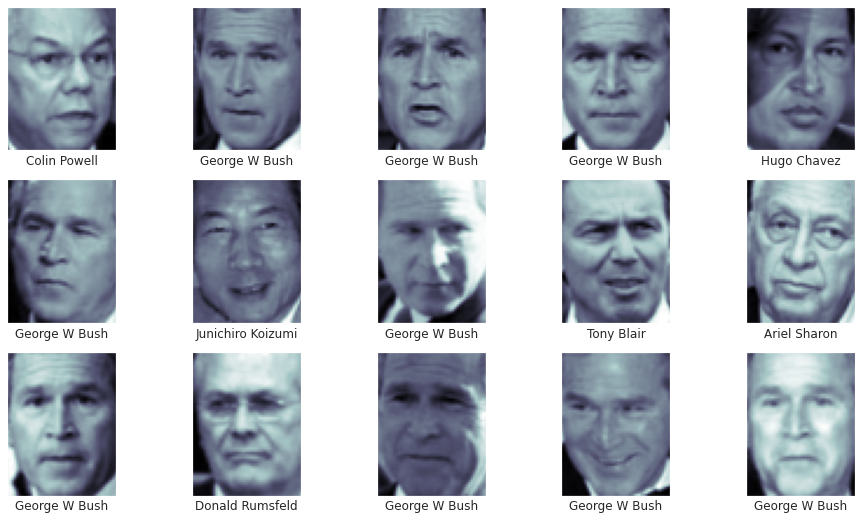

In [ ]:
# import matplotlib.pyplot as plt
fig, ax = plt.subplots(3,5, figsize=(16,9))
for i, ax_i in enumerate(ax.flat):
  ax_i.imshow(faces.images[i], cmap='bone')
  ax_i.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

In [ ]:
# from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
Xtrain, Xtest, Ytrain, Ytest = train_test_split(faces.data, faces.target, random_state=42)

param_grid = {
    'svc__C': [0.1, 1, 5, 10, 50],
    'svc__gamma': [0.0001, 0.005, 0.001, 0.005, 0.1]
}

grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, Ytrain)

CPU times: user 1min 36s, sys: 1min 10s, total: 2min 47s
Wall time: 1min 43s


GridSearchCV(estimator=Pipeline(steps=[('pca',
                                        PCA(n_components=150, random_state=42,
                                            whiten=True)),
                                       ('svc', SVC(class_weight='balanced'))]),
             param_grid={'svc__C': [0.1, 1, 5, 10, 50],
                         'svc__gamma': [0.0001, 0.005, 0.001, 0.005, 0.1]})

In [ ]:
print(grid.best_params_)

{'svc__C': 10, 'svc__gamma': 0.001}


In [ ]:
classifier = grid.best_estimator_
yfit = classifier.predict(Xtest)

Text(0.5, 0.98, 'Predictions')

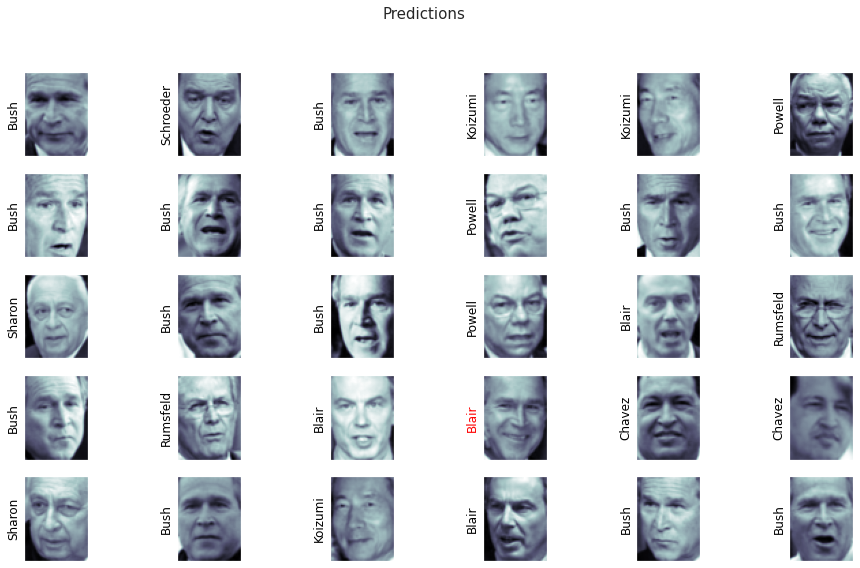

In [ ]:
fig, ax = plt.subplots(5,6, figsize=(16,9))

for i, ax_i in enumerate(ax.flat):
  ax_i.imshow(Xtest[i].reshape(62,47), cmap='bone')
  ax_i.set(xticks=[], yticks=[])
  ax_i.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                  color='black' if yfit[i] == Ytest[i] else 'red')


fig.suptitle('Predictions', size=15)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Ytest, yfit, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



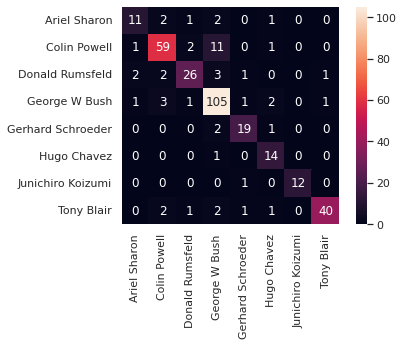

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()

mat = confusion_matrix(Ytest, yfit)

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=faces.target_names, yticklabels=faces.target_names) # T = tuplas



## Regresion / Estimation / Classification
## SVM

In [ ]:
from sklearn import svm, datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
iris = datasets.load_iris()
X = iris.data[:, :2]
Y = iris.target

In [ ]:
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1

h = (x_max - x_min) / 100

# Fabricar una meshgrid
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Esto combina las xs con las ys
x_plot = np.c_[xx.ravel(), yy.ravel()]
x_plot

array([[3.3  , 1.   ],
       [3.356, 1.   ],
       [3.412, 1.   ],
       ...,
       [8.732, 5.368],
       [8.788, 5.368],
       [8.844, 5.368]])

Text(0.5, 1.0, 'SVC iris Data kernel lineal')

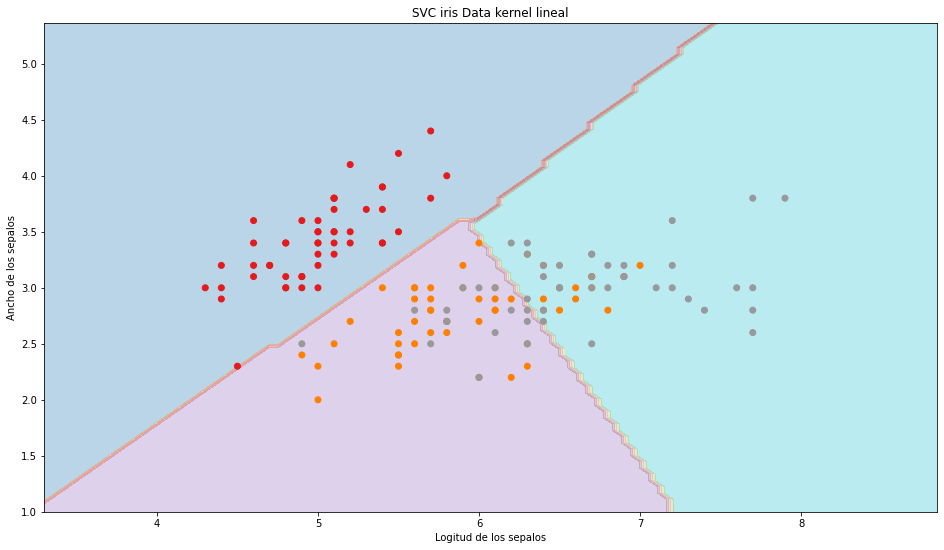

In [ ]:
C = 1.0
svc = svm.SVC(kernel='linear', C=C, decision_function_shape='ovr').fit(X, Y)
Ypred = svc.predict(x_plot)
Ypred = Ypred.reshape(xx.shape)

plt.figure(figsize=(16,9))
plt.contourf(xx, yy, Ypred, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.Set1)

plt.xlabel('Logitud de los sepalos')
plt.ylabel('Ancho de los sepalos')
plt.xlim(xx.min(), xx.max())
plt.title('SVC iris Data kernel lineal')

Text(0.5, 1.0, 'SVC iris Data kernel RBF')

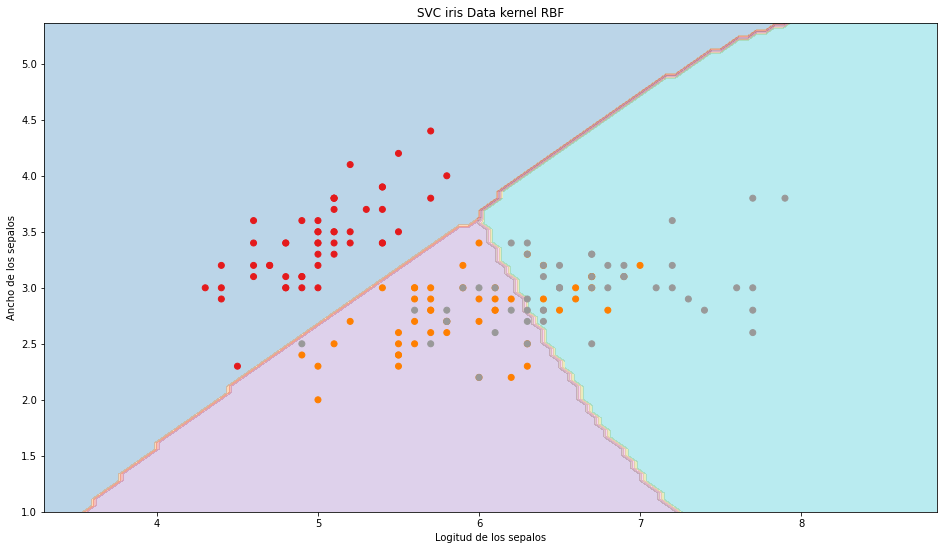

In [ ]:
C = 1.0
svc = svm.SVC(kernel='rbf', C=C, decision_function_shape='ovr').fit(X, Y)
Ypred = svc.predict(x_plot)
Ypred = Ypred.reshape(xx.shape)

plt.figure(figsize=(16,9))
plt.contourf(xx, yy, Ypred, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.Set1)

plt.xlabel('Logitud de los sepalos')
plt.ylabel('Ancho de los sepalos')
plt.xlim(xx.min(), xx.max())
plt.title('SVC iris Data kernel RBF')

Text(0.5, 1.0, 'SVC iris Data kernel RBF')

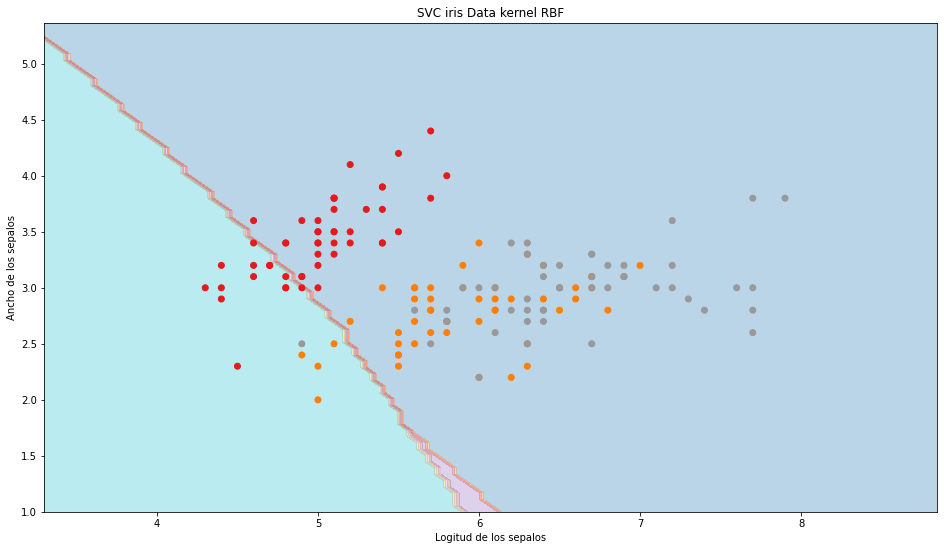

In [ ]:
C = 1.0
svc = svm.SVC(kernel='sigmoid', C=C, decision_function_shape='ovr').fit(X, Y)
Ypred = svc.predict(x_plot)
Ypred = Ypred.reshape(xx.shape)

plt.figure(figsize=(16,9))
plt.contourf(xx, yy, Ypred, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.Set1)

plt.xlabel('Logitud de los sepalos')
plt.ylabel('Ancho de los sepalos')
plt.xlim(xx.min(), xx.max())
plt.title('SVC iris Data kernel RBF')

Text(0.5, 1.0, 'SVC iris Data kernel RBF')

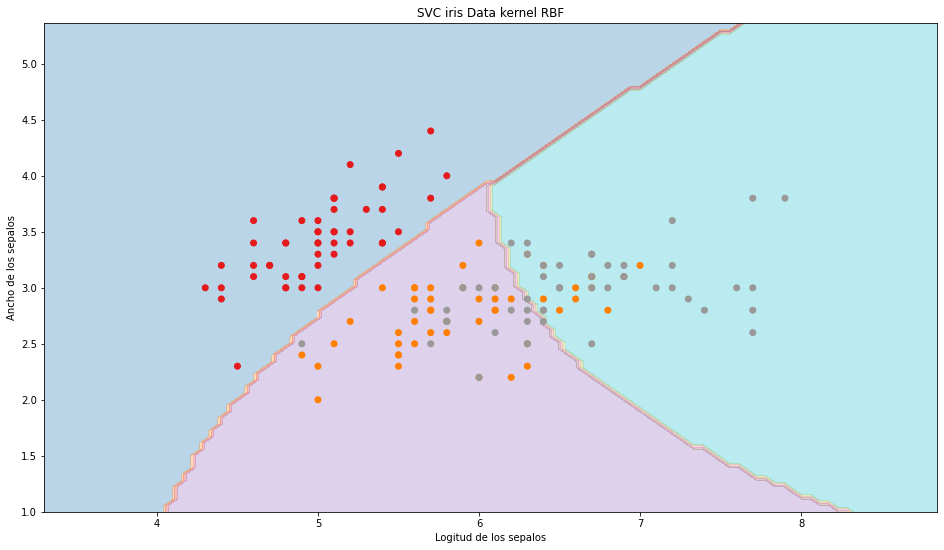

In [ ]:
C = 1.0
svc = svm.SVC(kernel='poly', C=C, decision_function_shape='ovr').fit(X, Y)
Ypred = svc.predict(x_plot)
Ypred = Ypred.reshape(xx.shape)

plt.figure(figsize=(16,9))
plt.contourf(xx, yy, Ypred, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.Set1)

plt.xlabel('Logitud de los sepalos')
plt.ylabel('Ancho de los sepalos')
plt.xlim(xx.min(), xx.max())
plt.title('SVC iris Data kernel RBF')

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.utils import shuffle

In [ ]:
X, Y = shuffle(X, Y, random_state=0)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

parameters = [
    {
        'kernel': ['rbf'],
        'gamma': [1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.5],
        'C': [1,10,100,1000]
    },
    {
        'kernel': ['linear'],
        'C': [1,10,100,1000]
    }
]

In [ ]:
# hacemos el clasificador
clf = GridSearchCV(svm.SVC(decision_function_shape='ovr'), param_grid=parameters, cv=5)
clf.fit(X, Y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

In [ ]:
# descubrimos los mejores parametros
clf.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [ ]:
# clf.cv_results_ es una gran lista con diferentes resultados
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
params = clf.cv_results_['params']
for m, s, p in zip(means, stds, params):
  print('%0.3f (+/-%0.3f) para %r'%(m, 2*s, p))

0.747 (+/-0.124) para {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.747 (+/-0.124) para {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.747 (+/-0.124) para {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.807 (+/-0.129) para {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.787 (+/-0.124) para {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
0.780 (+/-0.116) para {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
0.747 (+/-0.124) para {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.747 (+/-0.124) para {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.813 (+/-0.124) para {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.773 (+/-0.098) para {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.780 (+/-0.116) para {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}
0.767 (+/-0.126) para {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
0.747 (+/-0.124) para {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.813 (+/-0.124) para {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.760 (+/-0.107) para {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.780 (+/-0.080) para {'C': 100, 'gamma'

In [ ]:
y_pred = clf.predict(X_test)

print(classification_report(Y_test, y_pred, target_names=['setosa', 'versicolor', 'virginica']))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.60      0.82      0.69        11
   virginica       0.83      0.62      0.71        16

    accuracy                           0.79        38
   macro avg       0.81      0.81      0.80        38
weighted avg       0.81      0.79      0.79        38



## Resumen final

In [1]:
def svm_iris(C=1.0, gamma=0.01, kernel='rbf'):
  from sklearn import svm, datasets
  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt

  iris = datasets.load_iris()

  X = iris.data[:,:2]
  Y = iris.target

  x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
  y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
  h = (x_max - x_min) / 100

  # Fabricar una meshgrid
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

  # Esto combina las xs con las ys
  x_plot = np.c_[xx.ravel(), yy.ravel()]

  svc = svm.SVC(kernel=kernel, C=C, gamma=gamma, decision_function_shape='ovr').fit(X, Y)
  Ypred = svc.predict(x_plot)
  Ypred = Ypred.reshape(xx.shape)

  plt.figure(figsize=(16,9))
  plt.contourf(xx, yy, Ypred, cmap=plt.cm.tab10, alpha=0.3)
  plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.Set1)

  plt.xlabel('Logitud de los sepalos')
  plt.ylabel('Ancho de los sepalos')
  plt.xlim(xx.min(), xx.max())
  plt.title('SVC iris Data kernel ' +kernel)

In [3]:
from ipywidgets import interact, fixed

interact(svm_iris, C=[0.01, 0.1,1,10,100,1000, 1e6, 1e10],
         gamma=[1e-5, 1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.5, 0.99],
         kernel=['rbf', 'linear', 'sigmoid', 'poly'])

interactive(children=(Dropdown(description='C', index=2, options=(0.01, 0.1, 1, 10, 100, 1000, 1000000.0, 1000…

<function __main__.svm_iris(C=1.0, gamma=0.01, kernel='rbf')>

## SVM for Regression

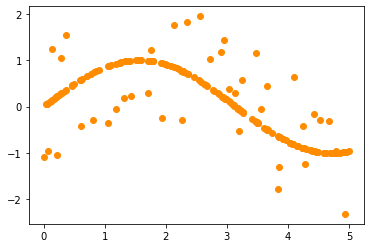

In [5]:
import numpy as np
import matplotlib.pyplot as plt

X = np.sort(5*np.random.rand(200,1), axis=0) # puntos de 0 a 5
Y = np.sin(X).ravel() # senos de 0 a 1 en array
Y[::5] += 3*(0.5 - np.random.rand(40))

plt.scatter(X, Y, color='darkorange', label='data')

In [7]:
from sklearn.svm import SVR

C = 1e3
svr_lin = SVR(kernel='linear', C=C)
svr_rbf = SVR(kernel='rbf', C=C, gamma=0.1)
svr_pol = SVR(kernel='poly', C=C, degree=3)

y_lin = svr_lin.fit(X, Y).predict(X)
y_rbf = svr_rbf.fit(X, Y).predict(X)
y_pol = svr_pol.fit(X, Y).predict(X)

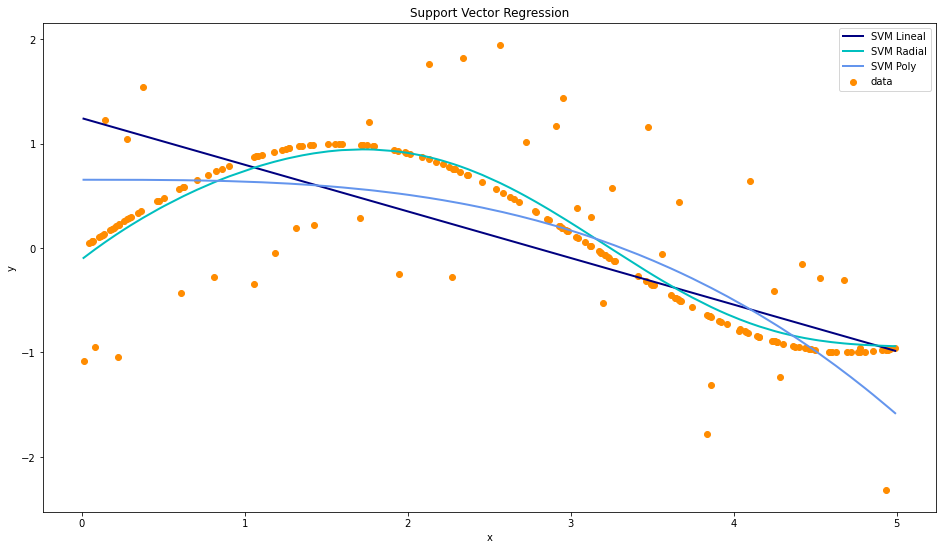

In [8]:
lw = 2 
plt.figure(figsize=(16,9))
plt.scatter(X, Y, color='darkorange', label='data')
plt.plot(X, y_lin, color='navy', lw=lw, label = 'SVM Lineal')
plt.plot(X, y_rbf, color='c', lw=lw, label='SVM Radial')
plt.plot(X, y_pol, color='cornflowerblue', lw=lw, label='SVM Poly')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Support Vector Regression')
plt.legend()
plt.show()